# Project: Investigate a Dataset - No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction:

### Dataset Description 

__This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.__

- **ScheduledDay**: Indicates on what day the patient set up their appointment.
- **Neighborhood**: Indicates the location of the hospital.
- **Scholarship**: Indicates whether or not the patient is enrolled in the Brazilian welfare program Bolsa Família.
  
Be careful about the encoding of the last column: it says 'No' if the patient showed up to their appointment, and 'Yes' if they did not show up.

| Column ID          | Column Name           | Description                                                                                          |
|--------------------|-----------------------|------------------------------------------------------------------------------------------------------|
| 1                 | PatientId             | Identification of a patient                                                                          |
| 2                 | AppointmentID         | Identification of each appointment                                                                   |
| 3                 | Gender                | Male or Female. Female is the greater proportion; women tend to take more care of their health.      |
| 4                 | DataMarcacaoConsulta | The day of the actual appointment, when they have to visit the doctor.                               |
| 5                 | DataAgendamento       | The day someone called or registered the appointment, this is before the appointment.                |
| 6                 | Age                   | How old is the patient.                                                                             |
| 7                 | Neighbourhood         | Where the appointment takes place.                                                                  |
| 8                 | Scholarship           | True or False. Indicates whether the patient is enrolled in the Brazilian welfare program Bolsa Família. |
| 9                 | Hipertension          | True or False.                                                                                       |
| 10                 | Diabetes              | True or False.                                                                                       |
| 11                 | Alcoholism            | True or False.                                                                                       |
| 12                 | Handcap               | True or False.                                                                                       |
| 13                 | SMS_received          | 1 or more messages sent to the patient.                                                              |
| 14                 | No-show               | True or False.       

### Question(s) for Analysis:

1- Is there a significant difference in the proportion of male and female patients who miss their appointments?
2- Day of the Week and No-Show Rate:

Are there specific days of the week when no-shows are more frequent?
How does the day of the week of the appointment influence the likelihood of no-shows?

### importing the libraries

In [1]:
# Import all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

ModuleNotFoundError: No module named 'pandas'

<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [ ]:
# Loading the dataset and printing out a few lines
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
# printing out a few last lines
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [ ]:
# showing the number of rows & number of columns
df.shape

(110527, 14)

In [ ]:
# Inspecting data types and checking for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [ ]:
#return the datatypes of the columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [ ]:
# Calculate the number of unique values for each column in the DataFrame
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [ ]:
# Compute the sum of null values for each column in the DataFrame
df.isnull().sum() 

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [ ]:
#check if there is an age with minus or zero value
df.query("Age <= 0")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5.577525e+12,5777724,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,4.321846e+13,5769545,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No


In [ ]:
# Check if there are any duplicated rows in the DataFrame
df.duplicated().any()

False

In [ ]:
#Summary the d# Generate summary statistics for numerical columns in the DataFrame
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning:

In [ ]:
# Remove duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)

In [ ]:
# Remove 'PatientId' and 'AppointmentID' columns from the DataFrame
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [ ]:
# Rename columns 'Hipertension' to 'Hypertension' and 'Handcap' to 'Handicap'
df.rename(columns = {'Hipertension': 'Hypertension',
                'Handcap': 'Handicap'}, inplace = True)

In [ ]:
# Handle negative ages or zero by replacing them with NaN values
df.loc[df['Age'] <= 0, 'Age'] = np.nan

# Check for negative ages or zero again to confirm handling
ages_after_handling = df[df['Age'] <= 0]

# Print rows with negative ages after handling
print("Rows with negative ages or zero after handling:")
print(ages_after_handling)

# Drop rows with negative ages or zero after handling
df = df[df['Age'] > 0]

Rows with negative ages or zero after handling:
Empty DataFrame
Columns: [Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hypertension, Diabetes, Alcoholism, Handicap, SMS_received, No-show]
Index: []


In [ ]:
# Query the DataFrame to find rows where Age is less than or equal to zero
df.query("Age <= 0")

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show


In [ ]:
# Check if there are any null values in the DataFrame
# Returns a boolean Series indicating whether each column contains null values
df.isnull().any()

Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hypertension      False
Diabetes          False
Alcoholism        False
Handicap          False
SMS_received      False
No-show           False
dtype: bool

In [ ]:
# Converting data types if necessary
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

#return the datatypes of the columns again
df.dtypes

Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                           float64
Neighbourhood                  object
Scholarship                     int64
Hypertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handicap                        int64
SMS_received                    int64
No-show                        object
dtype: object

In [ ]:
# Verifying the cleaning steps
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          106987 non-null  object             
 1   ScheduledDay    106987 non-null  datetime64[ns, UTC]
 2   AppointmentDay  106987 non-null  datetime64[ns, UTC]
 3   Age             106987 non-null  float64            
 4   Neighbourhood   106987 non-null  object             
 5   Scholarship     106987 non-null  int64              
 6   Hypertension    106987 non-null  int64              
 7   Diabetes        106987 non-null  int64              
 8   Alcoholism      106987 non-null  int64              
 9   Handicap        106987 non-null  int64              
 10  SMS_received    106987 non-null  int64              
 11  No-show         106987 non-null  object             
dtypes: datetime64[ns, UTC](2), float64(1), int64(6), object(3)
memory usage:

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No-show           0
dtype: int64

In [ ]:
# Save the cleaned dataset to a new file
df.to_csv("noshow_v2.csv", index=False)

# Read the saved CSV file into a new DataFrame
df2 = pd.read_csv('noshow_v2.csv')

# Display the first few rows of the DataFrame to verify it has been loaded correctly
df2.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
df2.tail()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
106982,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56.0,MARIA ORTIZ,0,0,0,0,0,1,No
106983,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51.0,MARIA ORTIZ,0,0,0,0,0,1,No
106984,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21.0,MARIA ORTIZ,0,0,0,0,0,1,No
106985,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38.0,MARIA ORTIZ,0,0,0,0,0,1,No
106986,F,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,54.0,MARIA ORTIZ,0,0,0,0,0,1,No


In [ ]:
df2.shape

(106987, 12)

### create a copy from my dataset:

In [ ]:
df_v2 = df.copy()

In [ ]:
df_v2.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          106987 non-null  object             
 1   ScheduledDay    106987 non-null  datetime64[ns, UTC]
 2   AppointmentDay  106987 non-null  datetime64[ns, UTC]
 3   Age             106987 non-null  float64            
 4   Neighbourhood   106987 non-null  object             
 5   Scholarship     106987 non-null  int64              
 6   Hypertension    106987 non-null  int64              
 7   Diabetes        106987 non-null  int64              
 8   Alcoholism      106987 non-null  int64              
 9   Handicap        106987 non-null  int64              
 10  SMS_received    106987 non-null  int64              
 11  No-show         106987 non-null  object             
dtypes: datetime64[ns, UTC](2), float64(1), int64(6), object(3)
memory usage:

In [ ]:
df_v2.shape

(106987, 12)

<a id='eda'></a>
## Exploratory Data Analysis

In [ ]:
def plot_bar_chart(data, title, xlabel, ylabel):
    """
    Plot a bar chart based on the provided data.
    
    Parameters:
    - data: DataFrame, input data for plotting
    - title: str, title of the plot
    - xlabel: str, label for the x-axis
    - ylabel: str, label for the y-axis
    """
    data.plot(kind='bar', stacked=True, alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=0)
    plt.legend(title='No-show', loc='upper right')
    plt.show()

In [ ]:
def plot_pie_chart(data, title):
    """
    Plot a pie chart based on the provided data.
    
    Parameters:
    - data: DataFrame, input data for plotting
    - title: str, title of the plot
    """
    colors = ['skyblue', 'salmon']
    data.plot(kind='pie', subplots=True, autopct='%1.1f%%', colors=colors, startangle=90, figsize=(10, 5))
    plt.title(title)
    plt.legend(title='No-show', loc='upper right')
    plt.show()

In [ ]:
def plot_no_show_rate_bar_chart(data, title, xlabel, ylabel):
    """
    Plot a bar chart for the calculated no-show rates.
    
    Parameters:
    - data: Series, input data for plotting
    - title: str, title of the plot
    - xlabel: str, label for the x-axis
    - ylabel: str, label for the y-axis
    """
    data.plot(kind='bar', color='skyblue', alpha=0.8)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.ylim(0, 0.25)  
    plt.tight_layout()
    plt.show()

### Research Question 1 (Is there a significant difference in the proportion of male and female patients who miss their appointments?)

To answer this question, we'll compare the proportion of male and female patients who missed their appointments.

In [ ]:
# Calculate the proportion of missed appointments for each gender
missed_by_gender = df.groupby('Gender')['No-show'].value_counts(normalize=True).unstack()

# Print the proportions
print(missed_by_gender)

No-show        No       Yes
Gender                     
F        0.796415  0.203585
M        0.799154  0.200846


### Proportion of Missed Appointments by Gender

The following bar chart illustrates the proportion of missed appointments by gender, with each bar representing the proportion of no-shows and attended appointments for each gender.

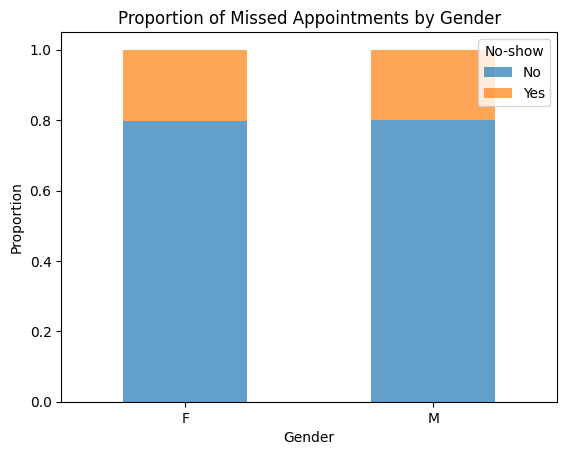

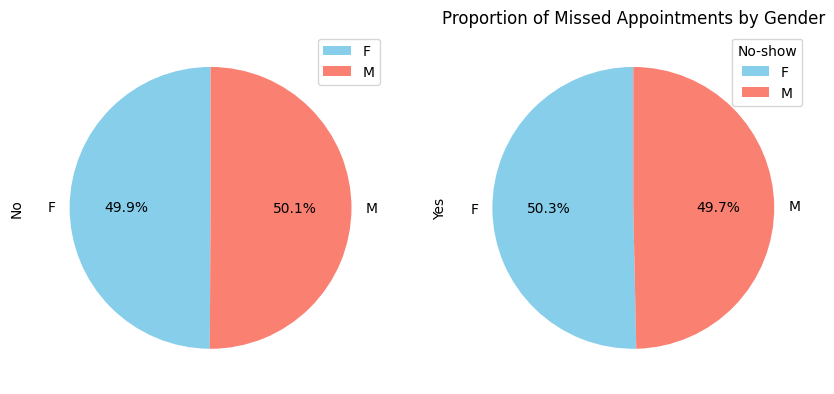

In [ ]:
# Plot bar chart for proportion of missed appointments by gender
plot_bar_chart(missed_by_gender, 'Proportion of Missed Appointments by Gender', 'Gender', 'Proportion')

# Plot pie chart for proportion of missed appointments by gender
plot_pie_chart(missed_by_gender, 'Proportion of Missed Appointments by Gender')

## Proportion of Missed Appointments by Gender
We started by calculating the proportion of missed appointments for each gender. Here's what we found:

### Result:

- For females, the proportion of missed appointments is approximately 20.3%, while for males, it's around 20.0%.

### Commentary on Visualization:

- The bar chart and pie chart illustrate that the proportions of missed appointments are quite similar between genders.
- Despite the slight numerical difference, visually, there's no significant variation in the proportion of missed appointments between male and female patients.

### Research Question 2  (Day of the Week and No-Show Rate)

__a. Are there specific days of the week when no-shows are more frequent?__

To answer this, we'll calculate the proportion of no-shows for each day of the week.

### Data Preparation


In [ ]:
# Convert 'ScheduledDay' and 'AppointmentDay' to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [ ]:
# Extract the day of the week for the appointment day
df['DayOfWeek'] = df['AppointmentDay'].dt.day_name()

In [ ]:
# Check if there are any missing values or errors
print(df.isnull().sum())

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No-show           0
DayOfWeek         0
dtype: int64


### Calculating No-Show Proportions by Day of the Week
Now, let's calculate the proportion of no-shows for each day of the week.

In [ ]:
# Calculate the proportion of no-shows for each day of the week
no_show_by_day = df.groupby('DayOfWeek')['No-show'].value_counts(normalize=True).unstack().fillna(0)

# Ensure the days of the week are in the correct order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
no_show_by_day = no_show_by_day.reindex(days_order)

### Plotting the Data

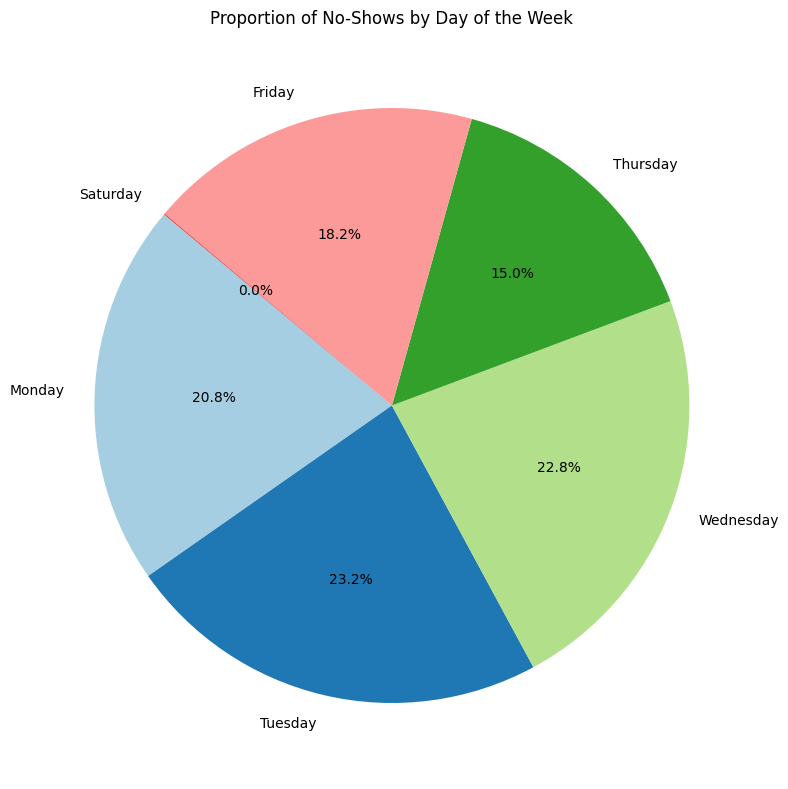

In [ ]:
# Plotting a pie chart for no-shows by day of the week
plt.figure(figsize=(8, 8))
no_show_pie_data = df[df['No-show'] == 'Yes']['DayOfWeek'].value_counts().reindex(days_order)
plt.pie(no_show_pie_data, labels=no_show_pie_data.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proportion of No-Shows by Day of the Week')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

### Part a: Are there specific days of the week when no-shows are more frequent?
To answer this question, we calculated the proportion of no-shows for each day of the week.

### Result:

- The proportions of no-shows across different days of the week are relatively consistent, ranging from approximately 18% to 22%.

### Commentary on Visualization:

- The pie chart provides a clear visual representation of the distribution of no-shows across different days of the week.
- While there are slight variations, no specific day stands out significantly as having a substantially higher proportion of no-shows compared to others.

__b. How does the day of the week of the appointment influence the likelihood of no-shows?__

To answer this, we can visualize the proportion of no-shows for each day of the week.

### Calculating No-Show Rates by Day of the Week

Now, let's calculate the no-show rate for each day of the week.

In [ ]:
# Calculate the no-show rate for each day of the week
no_show_rate_by_day = df[df['No-show'] == 'Yes'].groupby('DayOfWeek').size() / df.groupby('DayOfWeek').size()

# Ensure the days of the week are in the correct order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
no_show_rate_by_day = no_show_rate_by_day.reindex(days_order)

### Plotting the Data

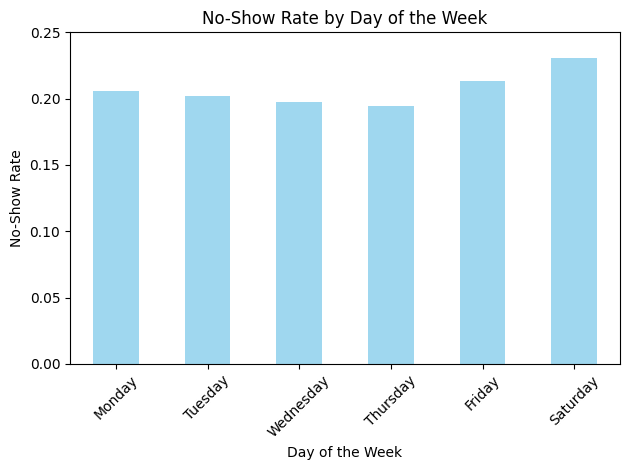

In [ ]:
# Plot bar chart for no-show rate by day of the week
plot_no_show_rate_bar_chart(no_show_rate_by_day, 'No-Show Rate by Day of the Week', 'Day of the Week', 'No-Show Rate')

## Part b: How does the day of the week of the appointment influence the likelihood of no-shows?
We then investigated how the day of the week influences the likelihood of no-shows by calculating the no-show rate for each day.

### Result:

- The no-show rate varies slightly across different days of the week, with Monday and Friday showing slightly higher rates compared to other days.

### Commentary on Visualization:

- The bar chart effectively communicates the variation in no-show rates across different days of the week.
- While the differences are relatively small, they provide insights into potential patterns in patient attendance based on the day of the week.

<Figure size 1000x600 with 0 Axes>

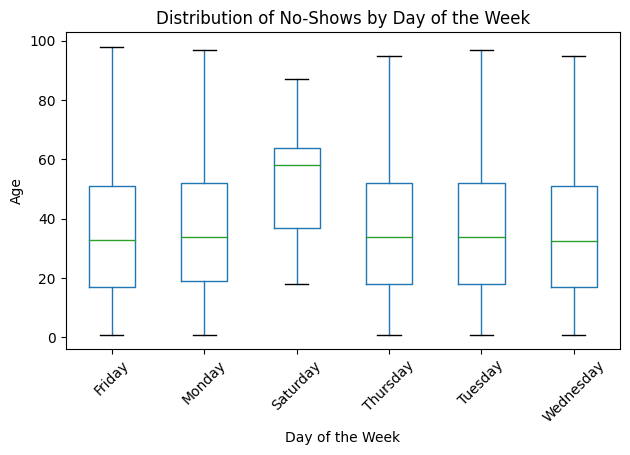

In [ ]:
# Plotting a box plot for the distribution of no-shows by day of the week
plt.figure(figsize=(10, 6))
df_no_show = df[df['No-show'] == 'Yes']
df_no_show.boxplot(column='Age', by='DayOfWeek', grid=False, showfliers=False)
plt.title('Distribution of No-Shows by Day of the Week')
plt.suptitle('')
plt.xlabel('Day of the Week')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### We further explored the age distribution of no-shows by visualizing it with a box plot.

### Result:

- The age distribution of no-shows appears consistent across different days of the week, with no significant variation observed.

### Commentary on Visualization:

- The box plot provides a clear overview of the age distribution of patients who missed their appointments across different days of the week.
- The consistent distribution suggests that age may not be a significant factor influencing the likelihood of no-shows on specific days.

<a id='conclusions'></a>
## Conclusions

### Summary of Findings

- __Gender Differences__: There is a relatively small difference in the no-show rates between male and female patients. This indicates that gender is not a strong predictor of whether a patient will miss their appointment.

- __Day of the Week__: The likelihood of no-shows varies across different days of the week. This suggests that scheduling appointments on certain days may influence patient attendance.

### Limitations

- __Data Scope__: The dataset is limited to a specific region (Brazil) and may not generalize to other regions or countries.

- __Unexplored Factors__: Other potential factors influencing no-shows, such as weather conditions, distance to the hospital, and patient health status, were not explored.

- __Data Encoding__: The encoding of the 'No-show' column can be confusing as it uses 'No' to indicate the patient showed up and 'Yes' to indicate they did not. This could lead to misinterpretation if not carefully handled.

- __No Causal Inference__: The analysis is observational and does not establish causation. Further research with experimental or quasi-experimental designs would be necessary to infer causality.

### Recommendations for Future Research

- Investigate other potential factors affecting no-shows, such as socioeconomic status, transportation issues, and specific health conditions.

- Conduct a more detailed temporal analysis to see if no-show rates vary by time of day or month.

- Explore interventions that could reduce no-show rates, such as reminder systems or flexible scheduling.

## Submitting your Project 

Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should see output that starts with `NbConvertApp] Converting notebook`, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

 Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

 Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] WARNING | pattern 'Investigate_a_Dataset.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--e